# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [91]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [93]:
df = pd.read_csv('Mall_Customers.csv', delimiter=',')

In [95]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Aqui se inicia a exploração e o pré processamento dos dados, verificando dados faltantes, excluindo variáveis categóricas e tratando dados que necessitam de tratamento.

In [97]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [99]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\dudir\AppData\Local\Temp\ipykernel_27404\875886493.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [101]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [103]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [105]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [107]:
df.drop(columns='CustomerID', inplace=True)
df.drop(columns='Gender', inplace=True)

Aqui termina o pré processamento e a exploração dos dados e se inicia a padronização e verificação de como serão feitos os clusters através do k-means.

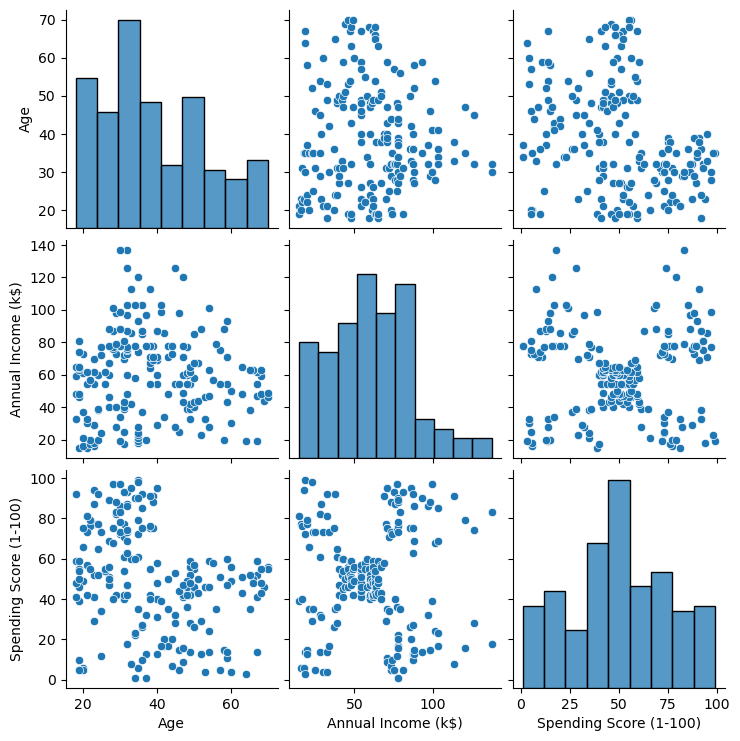

In [109]:
sns.pairplot(df)

In [113]:
df_padronizado = df.copy()

colunas_padronizar = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

scaler = StandardScaler()

df_padronizado[colunas_padronizar] = scaler.fit_transform(df[colunas_padronizar])

In [115]:
df_padronizado

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


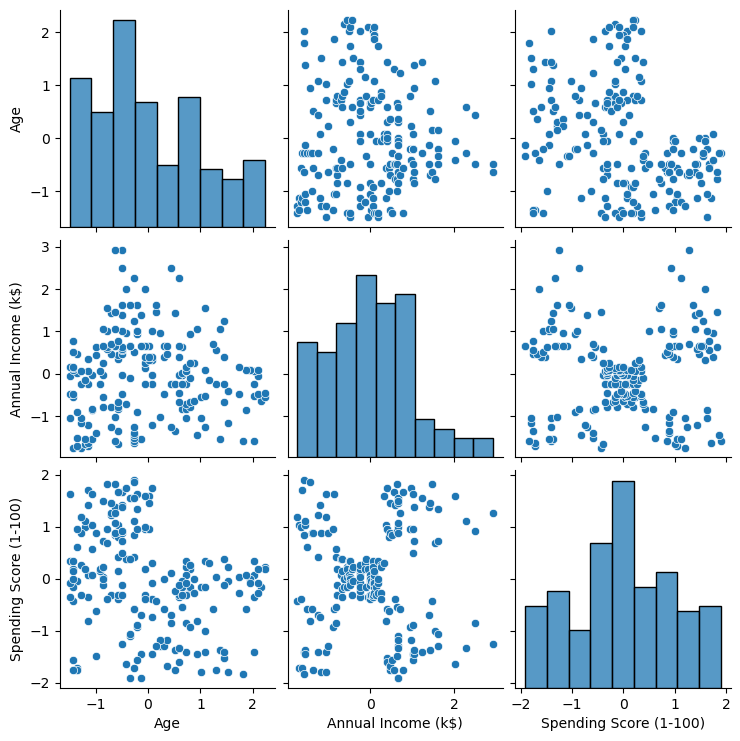

In [117]:
sns.pairplot(df_padronizado)

Aqui terminamos o processo de padronização e começamos a implementação do k-means, tratei e padronizei excluindo variáveis como Gênero e CustomerID, e padronizando para que fique de mais fácil interpretação para a máquina implementar os clusters.

In [119]:
kmeans_df_2 = KMeans (n_clusters=2, n_init=10, random_state=42)
kmeans_df_2.fit(df_padronizado)

C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=2, n_init=10, random_state=42)

In [121]:
centroides_padronizados_2 = kmeans_df_2.cluster_centers_
centroides_padronizados_2

array([[ 0.70892251, -0.00247545, -0.69939115],
       [-0.75277339,  0.00262858,  0.74265245]])

In [123]:
centroides_originais_2 = scaler.inverse_transform(centroides_padronizados_2)
centroides_originais_2

array([[48.72815534, 60.49514563, 32.18446602],
       [28.36082474, 60.62886598, 69.32989691]])

In [125]:
labels_2 = kmeans_df_2.labels_
labels_2

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [133]:
kmeans_df_5 = KMeans (n_clusters=5, n_init=10, random_state=42)
kmeans_df_5.fit(df_padronizado)

C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5, n_init=10, random_state=42)

In [135]:
centroides_padronizados_5 = kmeans_df_5.cluster_centers_
centroides_padronizados_5

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.98067852, -0.74305983,  0.46744035],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675],
       [ 1.20484056, -0.23577338, -0.05236781]])

In [137]:
centroides_originais_5 = scaler.inverse_transform(centroides_padronizados_5)
centroides_originais_5

array([[46.25      , 26.75      , 18.35      ],
       [25.18518519, 41.09259259, 62.24074074],
       [32.875     , 86.1       , 81.525     ],
       [39.87179487, 86.1025641 , 19.35897436],
       [55.63829787, 54.38297872, 48.85106383]])

In [139]:
labels_5 = kmeans_df_5.labels_
labels_5

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 3, 1, 1, 1, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Aqui decidi testar o k-means com 2 e com 5 clusters, para identificar qual se adapta melhor às variáveis que temos.

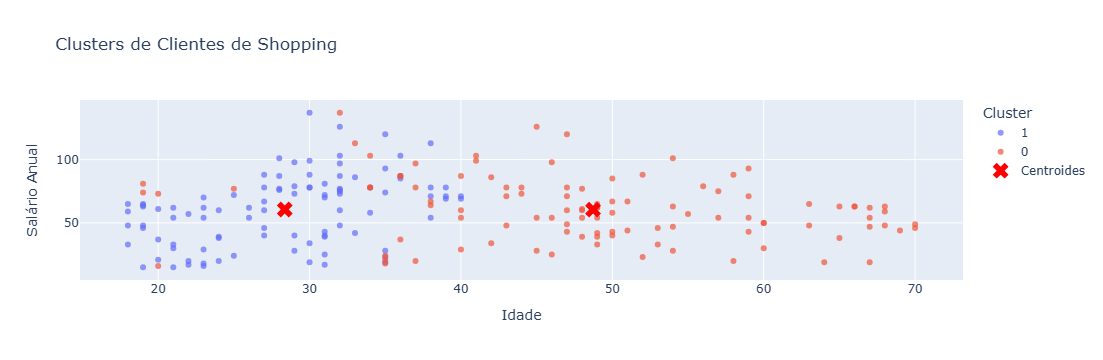

In [127]:
df_clusters_2 = pd.DataFrame({
    'Age': df['Age'],
    'Annual Income (k$)': df['Annual Income (k$)'],
    'cluster': labels_2.astype(str)
})

fig = px.scatter(df_clusters_2, x='Age', y='Annual Income (k$)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_2[:, 0], y=centroides_originais_2[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Idade', yaxis_title='Salário Anual',
                  legend_title='Cluster')
fig.show()

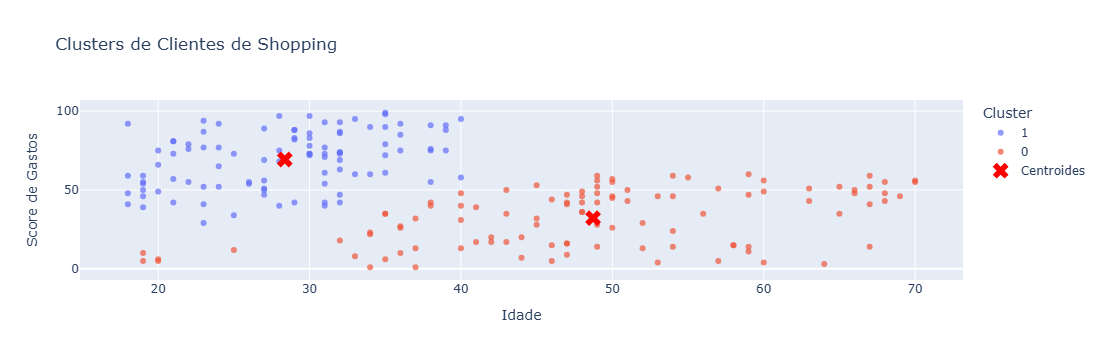

In [129]:
df_clusters_2 = pd.DataFrame({
    'Age': df['Age'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': labels_2.astype(str)
})

fig = px.scatter(df_clusters_2, x='Age', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_2[:, 0], y=centroides_originais_2[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Idade', yaxis_title='Score de Gastos',
                  legend_title='Cluster')
fig.show()

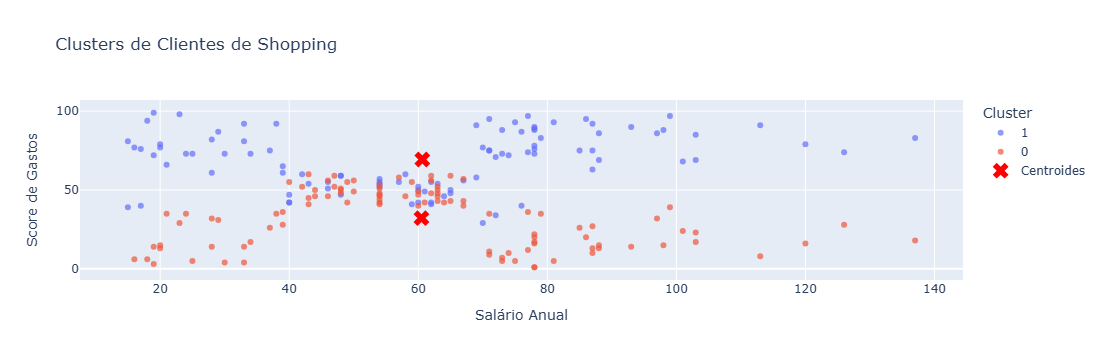

In [141]:
df_clusters_2 = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': labels_2.astype(str)
})

fig = px.scatter(df_clusters_2, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_2[:, 1], y=centroides_originais_2[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Salário Anual', yaxis_title='Score de Gastos',
                  legend_title='Cluster')
fig.show()

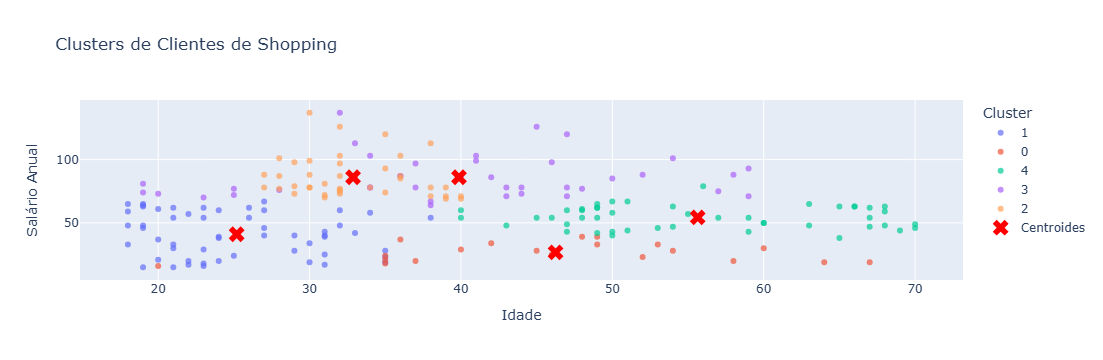

In [143]:
df_clusters_5 = pd.DataFrame({
    'Age': df['Age'],
    'Annual Income (k$)': df['Annual Income (k$)'],
    'cluster': labels_5.astype(str)
})

fig = px.scatter(df_clusters_5, x='Age', y='Annual Income (k$)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_5[:, 0], y=centroides_originais_5[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Idade', yaxis_title='Salário Anual',
                  legend_title='Cluster')
fig.show()

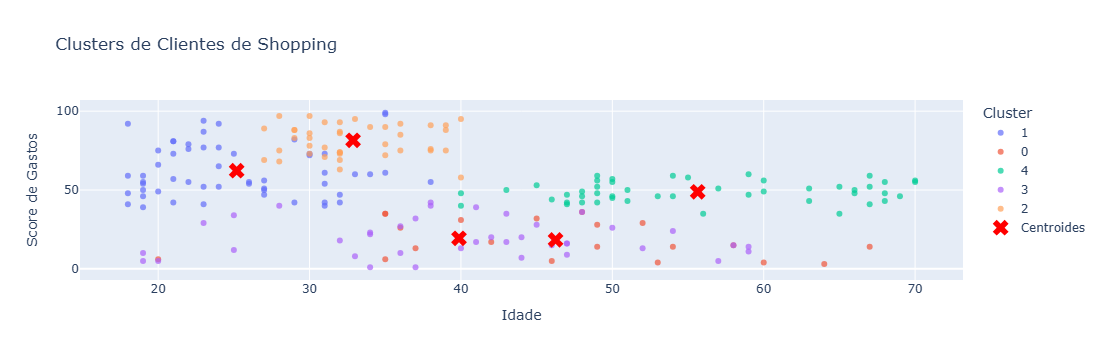

In [145]:
df_clusters_5 = pd.DataFrame({
    'Age': df['Age'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': labels_5.astype(str)
})

fig = px.scatter(df_clusters_5, x='Age', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_5[:, 0], y=centroides_originais_5[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Idade', yaxis_title='Score de Gastos',
                  legend_title='Cluster')
fig.show()

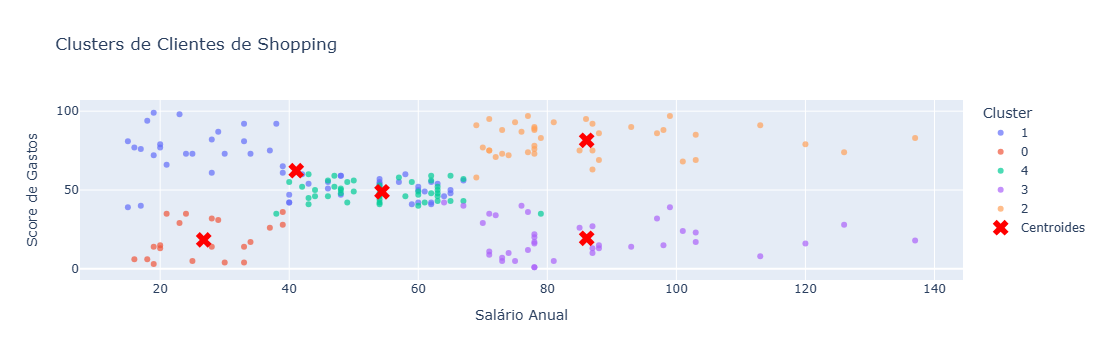

In [147]:
df_clusters_5 = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': labels_5.astype(str)
})

fig = px.scatter(df_clusters_5, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Clientes de Shopping')

fig.add_scatter(x=centroides_originais_5[:, 1], y=centroides_originais_5[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Salário Anual', yaxis_title='Score de Gastos',
                  legend_title='Cluster')
fig.show()

Aqui se encerra a atividade, tendo testado as relações das variáveis com 2 e 5 clusters, podemos perceber que com 5 clusters fica de melhor interpretação e tirar alguns insights:

• Em relação ao gráfico de idade x score de gastos podemos ver clusters claros, 1 e 2 são de clientes de score alto e pouca idade, muito provavelmente retratando jovens que frequentam bastante o shopping e gastam quando vão também, para esses clientes, o procedimento seria enviar promoções e notificações de eventos com uma frequência alta. Os clusters 0 e 3 são de pessoas de meia idade, média entre 40 e 50, e gastam pouco, pois são as de score mais baixo, para essas pessoas, deveríamos enviar esporadicamente promoções e eventos para pessoas de meia idade. E por último, o cluster 4 representa pessoas mais velhas que pouco frequentam e gastam no shopping, para essas, deveríamos raramente divulgar eventos para pessoas mais velhas.

• Já se tratando do gráfico salário anual x score de gastos, o cluster 0 representa pessoas com salário baixo e score de gastos baixos também, para essas, deveríamos enviar promoções e eventos baratos, mas com muito pouca frequência. Nos clusters 1 e 4, temos pessoas que não tem um salário acima dea média, mas que tem um score entre médio e alto, o que significa divulgar coisas com bastante frequência, mas que sejam mais baratas, dado o salário baixo. O cluster 3 representa pessoas que possuem um salário alto, mas que têm um score baixo, o que significa que gastam pouco, para esses clientes, deveríamos enviar notificações raramente, mas de eventos e compras mais caras quando for enviado. E por último o cluster 2 representa o tipo de cliente que possui um salário bem alto, e também um score bem alto, o que significa que ganham e gastam muito e com frequência, para esses devemos enviar bastante promoções e eventos, e que podem ser de um vaor mais alto, pois eles têm tendência a gastar.